# <b><center>CHICAGO NEIGHBORHOOD BUSINESS ANALYSIS</center></b>

<font size = 4><b>Importing required packages</b>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size = 4><br><br>Fetching the list of Chicago neighborhoods by webscraping <a href="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago">wikipedia</a> using <b>urllib.request</b> package and selecting the table of interest using <b>BeautifulSoup</b> package</font>

In [2]:
import urllib.request
from bs4 import BeautifulSoup

#Declaring the URL
url = "https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago"

#Importing the HTML source code of the webpage
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

#Selecting the required table using the class parameter
wiki_table=soup.find('table', class_='wikitable sortable')

<font size = 4><br><br>Storing the table from <a href="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago">wikipedia</a> as a DataFrame

In [3]:
#Declaring two empty lists to store the values of the two columns
col1, col2 = [], []

#Appending data from each row into the above lists using the for loop
for data in wiki_table.findAll('tr'):
    value = data.findAll('td')
    
#Check if the value is present for all 2 columns to avoid issue with header column
    if (len(value)==2):
        col1.append(value[0].find(text=True))
        col2.append(value[1].find(text=True))

In [4]:
col1[-5:], col2[-5:]

(['Wildwood',
  'Woodlawn\n',
  'Wrightwood\n',
  'Wrightwood Neighbors\n',
  'Wrigleyville'],
 ['Forest Glen\n', 'Woodlawn', 'Ashburn', 'Lincoln Park\n', 'Lake View'])

<font size = 4>It can be seen that a few of the neighborhoods and community areas are extracted along with the next line ('\n') code and hence they need to be removed before storing them  in a dataframe<br><br><br></font>

In [5]:
#Checking for presence of \n in both lists and removing it using for loop
for i in range (len(col1)):
    
    if(col1[i][-1]=='\n'):
        col1[i] = col1[i][:-1]
    
    if(col2[i][-1]=='\n'):
        col2[i] = col2[i][:-1]

#Combining both the lists into a single DataFrame
chicago_neigh = pd.DataFrame(zip(col1, col2), columns=["Neighborhood","Community Area"])
chicago_neigh.head(11)

,Neighborhood,Community Area
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square
5,Ashburn,Ashburn
6,Ashburn Estates,Ashburn
7,Auburn Gresham,Auburn Gresham
8,Avalon Park,Avalon Park
9,Avondale,Avondale


In [6]:
Codes = pd.read_csv("Codes.csv", index_col=0)

<font size=4><br><br>The coordinates of each neighborhood can be obtained from Google Maps by leveraging Google API</font>

In [7]:
#Creating a googlemaps object using thr API Key

#!pip install googlemaps
import googlemaps
gmaps = googlemaps.Client(key=Codes.loc["Google_API"][0])

In [8]:
#Determining the coordinates for each neighborhood using a for loop and storing them in seperate lists
lat=[]
long=[]

for i in range(chicago_neigh.shape[0]):
    geocode_result = gmaps.geocode('{}, {}, Chicago, Illinois'.format(chicago_neigh.iloc[i,0], chicago_neigh.iloc[i,1]))
    lat.append(geocode_result[0]['geometry']['location']['lat'])
    long.append(geocode_result[0]['geometry']['location']['lng'])

In [9]:
#Adding the Latitiude and Longitude lists as columns in the previously created Chicago Neighborhood DataFrame
chicago_neigh["Latitude"] = lat
chicago_neigh["Longitude"] = long
chicago_neigh.head(11)

,Neighborhood,Community Area,Latitude,Longitude
0,Albany Park,Albany Park,41.968327,-87.728028
1,Altgeld Gardens,Riverdale,41.654165,-87.599686
2,Andersonville,Edgewater,41.981658,-87.668476
3,Archer Heights,Archer Heights,41.807900,-87.723585
4,Armour Square,Armour Square,41.840755,-87.634019
5,Ashburn,Ashburn,41.749690,-87.712007
6,Ashburn Estates,Ashburn,41.749690,-87.712007
7,Auburn Gresham,Auburn Gresham,41.743377,-87.656199
8,Avalon Park,Avalon Park,41.741689,-87.594829
9,Avondale,Avondale,41.941501,-87.702502


In [10]:
# Exporting the dataframe to a worksheet
writer = pd.ExcelWriter('Chicago.xlsx', engine='xlsxwriter')
chicago_neigh.to_excel(writer, sheet_name='Chicago Neighborhoods', index=False)

In [11]:
#Determining the coordinates for Chicago
geocode_result = gmaps.geocode('Chicago, IL')
chicago_lat = geocode_result[0]['geometry']['location']['lat']
chicago_long = geocode_result[0]['geometry']['location']['lng']

print("Chicago Latitude =",chicago_lat,"\t\tChicago Longitude =",chicago_long)

Chicago Latitude = 41.8781136 		Chicago Longitude = -87.6297982


<br><br><font size = 4>The list of Neighborhoods can now be plotted on a map using the <a href="https://python-visualization.github.io/folium/#:~:text=folium%20makes%20it%20easy%20to,as%20markers%20on%20the%20map."><b>Folium</b></a> package</font>

In [12]:
# Installing and importing the Folium Package
#!pip install folium
import folium

# Creating a folium map with location zoomed in at coordinates of Chicago
map_chicago = folium.Map(location=[chicago_lat, chicago_long], zoom_start=11)

# Adding every neighborhood as a marker on the map using their coordinates and adding their information as pop up labels
for lat, lng, neighborhood , com_area in zip(chicago_neigh['Latitude'], chicago_neigh['Longitude'], chicago_neigh['Neighborhood'], chicago_neigh['Community Area']):
    label = '{}, {}'.format(neighborhood, com_area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  

# Adding a title for the map
title = '''<h2 align="center" style="font-size:20px"><b>CHICAGO NEIGHBORHOOD</b></h2>'''
map_chicago.get_root().html.add_child(folium.Element(title))

# Display the map
map_chicago

<br><br><font size=4><a href="https://en.wikipedia.org/wiki/Foursquare_City_Guide">FourSquare</a> is an application which provides recommendations of places based on a user's location. The details regarding the types of businesses in a neighborhood can be acquired using the <a href="https://developer.foursquare.com/">API</a> of this application </font>

In [13]:
#FourSquare API Details
CLIENT_ID = Codes.loc["FS_CLIENT_ID"][0]
CLIENT_SECRET = Codes.loc["FS_CLIENT_SECRET"][0]
VERSION = Codes.loc["FS_VERSION"][0]

In [14]:
import requests

# Setting the search radius as 500 meters
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for i, name, lat, lng in zip(range(len(names)),names, latitudes, longitudes):
        
        # Creating the API request URL with a limit of 100 businesses in a neighborhood
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, 100)
        
        # The GET request fetches upto 100 businesses in each neighborhood which can be obtained in a json file
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # The required details of each business is extracted from the json file along with the details of the neighborhood and appended in the list "venues_list"
        venues_list.append([(name, lat, lng,
                             v['venue']['name'],
                             v['venue']['location']['lat'],
                             v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name']) for v in results])
        
        
        #Each neighborhood is stored inside a seperate list each of which comprises of a seperate tuple for each individual business of that neighborhood
        #Converting each tuple into a row for a dataframe
        nearby_venues = pd.DataFrame([item for v_list in venues_list for item in v_list])

        #Setting the column names for the DataFrame
        nearby_venues.columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 
                                 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [15]:
# Calling the above created function to detemine the different businesses in each neighborhood
chicago_venues = getNearbyVenues(names=chicago_neigh['Neighborhood'], latitudes=chicago_neigh['Latitude'], longitudes=chicago_neigh['Longitude'])
chicago_venues.to_excel(writer, sheet_name='Chicago Venues', index=False)
chicago_venues.head(11)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany Park,41.968327,-87.728028,Starbucks,41.968911,-87.728817,Coffee Shop
1,Albany Park,41.968327,-87.728028,Lawrence Fish Market,41.968280,-87.726250,Seafood Restaurant
2,Albany Park,41.968327,-87.728028,Marie's Pizza & Liquors,41.968132,-87.731533,Pizza Place
3,Albany Park,41.968327,-87.728028,Dunkin',41.967933,-87.729699,Donut Shop
4,Albany Park,41.968327,-87.728028,Gamblers,41.970398,-87.728289,Dive Bar
5,Albany Park,41.968327,-87.728028,Pollo Campero,41.968968,-87.728866,Fried Chicken Joint
6,Albany Park,41.968327,-87.728028,Ssyal Korean Restaurant and Ginseng House,41.968172,-87.733207,Korean Restaurant
7,Albany Park,41.968327,-87.728028,Chicago Kalbi Korean BBQ,41.968314,-87.722771,Korean Restaurant
8,Albany Park,41.968327,-87.728028,Petco,41.969297,-87.728584,Pet Store
9,Albany Park,41.968327,-87.728028,T-Mobile,41.969191,-87.729024,Mobile Phone Shop


<br><br><font size=4>Number of businesses for each neighborhood returned by the API can be checked by using the <b>groupby</b> function on the <font color="Red">'Neighborhood'</font> column.

In [16]:
chicago_venues.groupby('Neighborhood').count()["Neighborhood Latitude"].head(11)

Neighborhood
Albany Park         30
Altgeld Gardens      2
Andersonville       46
Archer Heights      22
Armour Square       13
Ashburn              6
Ashburn Estates      6
Auburn Gresham       4
Avalon Park          2
Avondale            37
Avondale Gardens    14
Name: Neighborhood Latitude, dtype: int64

<br><br><font size=4>Clustering is performed based on the frequency of a venue is each neighborhood. Hence removing neighborhoods for which less than 5 venues have been returned to avoid skewing of results</font>

In [17]:
# Boolean list to determine which neighborhoods have less than 5 venues returned
boolean = chicago_venues.groupby('Neighborhood').count()["Neighborhood Latitude"]<5

# Storing the name of these neighborhoods in a list
less_than_5 = boolean.iloc[[i for i, x in enumerate(boolean) if x]].index

# Selecting only neighborhoods which are not present in the above list
boolean = []
for neighborhood in chicago_venues["Neighborhood"]:
    boolean.append(neighborhood not in less_than_5)
    
chicago_venues = chicago_venues[boolean]

<br><br><font size=4>Number of different businesses categories for Chicago can be obtained by using the <b>unique</b> function</font>

In [18]:
print("Total different venue categories in Chicago neighborhoods =",len(chicago_venues['Venue Category'].unique()))

Total different venue categories in Chicago neighborhoods = 349


<br><br><font size=4>The most frequent/common types of business in a neighborhood can be determined by the frequency of each venue type</font>

In [19]:
# Creating dummy variables for each venue type
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues['Neighborhood']

# Move Neighborhood column to first position in the data frame
cols = list(chicago_onehot.columns.values)
cols.pop(cols.index('Neighborhood'))
chicago_onehot = chicago_onehot[['Neighborhood']+cols]

# Grouping the dataframe by 'Neighborhood' and determining mean for each column to determine the frequecy of each business type
chicago_onehot = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_onehot.head(10)

,Neighborhood,ATM,Accessories Store,African Restaurant,Airport,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Albany Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Andersonville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.021739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Archer Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Armour Square,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ashburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Ashburn Estates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Avondale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Avondale Gardens,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Back of the Yards,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Belmont Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
chicago_onehot.to_excel(writer, sheet_name='Business Frequency', index=False)

In [21]:
#Creating a function to sort an individual row in descending order based on frequeny of a venue type
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
# Selecting 10 most frequent venues in a neighborhood 
num_top_venues = 10


# Creating the column names for new DataFrame
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Creating a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_onehot['Neighborhood']

# Appending each row in the new DataFrae with the 10 most commom venues in order
for ind in np.arange(chicago_onehot.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_onehot.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(11)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Pizza Place,Korean Restaurant,Hookah Bar,Seafood Restaurant,Thai Restaurant,Fried Chicken Joint,Taco Place,Mobile Phone Shop,Financial or Legal Service,Snack Place
1,Andersonville,Coffee Shop,Bakery,Breakfast Spot,Lounge,Sandwich Place,Burger Joint,Café,Bus Station,Miscellaneous Shop,New American Restaurant
2,Archer Heights,Mexican Restaurant,Bakery,Hotel,Video Store,Bar,Bank,Mobile Phone Shop,Seafood Restaurant,Grocery Store,Restaurant
3,Armour Square,Chinese Restaurant,Cosmetics Shop,Sandwich Place,Hot Dog Joint,Grocery Store,Soccer Field,Café,Gas Station,Italian Restaurant,Fast Food Restaurant
4,Ashburn,Cosmetics Shop,Mexican Restaurant,Fried Chicken Joint,Home Service,Insurance Office,Light Rail Station,Flower Shop,Fondue Restaurant,Event Service,Event Space
5,Ashburn Estates,Cosmetics Shop,Mexican Restaurant,Fried Chicken Joint,Home Service,Insurance Office,Light Rail Station,Flower Shop,Fondue Restaurant,Event Service,Event Space
6,Avondale,Mexican Restaurant,Coffee Shop,Dance Studio,Food Truck,Martial Arts Dojo,German Restaurant,Donut Shop,Restaurant,Korean Restaurant,Theater
7,Avondale Gardens,Sandwich Place,Bus Station,Italian Restaurant,Argentinian Restaurant,Intersection,Gas Station,Train Station,Park,New American Restaurant,General Entertainment
8,Back of the Yards,Mexican Restaurant,Pizza Place,Bank,Chinese Restaurant,Grocery Store,Laundromat,Fast Food Restaurant,Liquor Store,Furniture / Home Store,Shoe Store
9,Belmont Central,Pool,Park,Mexican Restaurant,Fast Food Restaurant,Bus Stop,Butcher,Liquor Store,Gas Station,Bakery,Sandwich Place


<br><br> <font size=4>Applying <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">K-Means</a> <a href = "https://scikit-learn.org/stable/modules/clustering.html">clustering</a> algorithm from <a href="https://scikit-learn.org/stable/">Scikit-learn</a> package to segregate neighborhoods into 4 different clusters based on frequency of venues in the onehot DataFrame</font>

In [23]:
from sklearn.cluster import KMeans

# Number of clusters
kclusters = 4

chicago_cluster = chicago_onehot.drop('Neighborhood', 1)

# K-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_cluster)

# Adding clustering labels as a column in the dataframe
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# Merging the inital Chicago Neighborhood DataFrame and Common Venues DataFrame
chicago_merged = chicago_neigh
chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

chicago_merged = chicago_merged[chicago_merged['Cluster Labels'].notna()]
chicago_merged['Cluster Labels']=chicago_merged['Cluster Labels'].astype("int")

chicago_merged.head()

,Neighborhood,Community Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Albany Park,41.968327,-87.728028,1,Pizza Place,Korean Restaurant,Hookah Bar,Seafood Restaurant,Thai Restaurant,Fried Chicken Joint,Taco Place,Mobile Phone Shop,Financial or Legal Service,Snack Place
2,Andersonville,Edgewater,41.981658,-87.668476,1,Coffee Shop,Bakery,Breakfast Spot,Lounge,Sandwich Place,Burger Joint,Café,Bus Station,Miscellaneous Shop,New American Restaurant
3,Archer Heights,Archer Heights,41.807900,-87.723585,0,Mexican Restaurant,Bakery,Hotel,Video Store,Bar,Bank,Mobile Phone Shop,Seafood Restaurant,Grocery Store,Restaurant
4,Armour Square,Armour Square,41.840755,-87.634019,1,Chinese Restaurant,Cosmetics Shop,Sandwich Place,Hot Dog Joint,Grocery Store,Soccer Field,Café,Gas Station,Italian Restaurant,Fast Food Restaurant
5,Ashburn,Ashburn,41.749690,-87.712007,0,Cosmetics Shop,Mexican Restaurant,Fried Chicken Joint,Home Service,Insurance Office,Light Rail Station,Flower Shop,Fondue Restaurant,Event Service,Event Space


In [24]:
# Exporting the dataframe to a worksheet
chicago_merged.to_excel(writer, sheet_name='Clusters & Top 10', index=False)

<br><br><font size=4>The cluster labels are now obtained and inserted into the DataFrame on the basis of which the nieghborhods can be colo coded on a map to indicate cluster of similar neighborhoods</font>

In [25]:
# Color code for each cluster label
col_map = ['Blue','Gold','Red','Lime']

# Creating a folium map with location zoomed in at coordinates of Chicago
map_clusters = folium.Map(location=[chicago_lat, chicago_long], zoom_start=11)


# Adding every neighborhood as a marker on the map using their coordinates and adding their information as pop up labels
markers_colors = []
for lat, lon, neighborhood, comarea, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighborhood'], chicago_merged['Community Area'] ,chicago_merged['Cluster Labels']):
    col=col_map[cluster] #Selecting the color on the basis of cluster label
    
    label = folium.Popup(str(neighborhood) +" , "+ str(comarea), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=col, #Setting the color of each marker on the basis of cluster label
        fill=True,
        fill_color=col,
        fill_opacity=0.7).add_to(map_clusters)

# Map Title
title = '''<h3 align="center" style="font-size:20px"><b>Chicago Neighborhood Analysis using K-Means</b></h3>'''
map_clusters.get_root().html.add_child(folium.Element(title))       

#Display the map
map_clusters

<br><br><font size=4>The number of neighborhoods in each cluster can be obtained using the <b></b> function on the <font color="Red">"Cluster Labels"</font> column

In [26]:
# Creating a new dataframe with percentage of neighborhoods in each cluster as a column
Neighbor_Cluster_Count = chicago_merged["Cluster Labels"].value_counts(normalize=True).to_frame()

# Setting the cluster labels as index
Neighbor_Cluster_Count["Cluster"] = Neighbor_Cluster_Count.index

# Adding the number of neighborhoods in each cluster as an individual column
Neighbor_Cluster_Count["Neighborhoods count"] = chicago_merged["Cluster Labels"].value_counts()

# Converting the 'Cluster Labels' into percentage values in a new column and dropping 'Cluster Labels' column
Neighbor_Cluster_Count["Percentage"] = round(Neighbor_Cluster_Count["Cluster Labels"]*100,2)
Neighbor_Cluster_Count.drop(['Cluster Labels'], axis=1, inplace=True)

#Sorting the values based on the index column
Neighbor_Cluster_Count.sort_values(["Cluster"], inplace=True)
Neighbor_Cluster_Count.set_index("Cluster", inplace=True)

# Adding colors of eacch corresponding cluster in a new column
Neighbor_Cluster_Count["Color"] = col_map[:kclusters]

Neighbor_Cluster_Count

,Neighborhoods count,Percentage,Color
Cluster,,,
0,22,10.28,Blue
1,136,63.55,Gold
2,21,9.81,Red
3,35,16.36,Lime


<font size = 4><b>Cluster</b> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - Cluster Number<br>
<b>Neighborhoods count</b> &emsp;&emsp; - Number of neighborhoods in the cluster<br>
<b>Percentage</b> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; - Percentage of total neighborhoods in the cluster<br>
<b>Color</b> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;- Color of the cluster</font>

<p style='text-align: justify;'><font size = 4>Nearly <font color='gold'>65%</font> of the neighborhoods are similar in nature and belong to a single cluster (<font color='gold'>Cluster 1</font>) while <font color='lime'>15%</font> belong to <font color='lime'>Cluster 3</font>.<br><br>The remaining two, <font color='blue'>Cluster 0</font> & <font color='red'>Cluster 2</font> each comprise of nearly <font color="blue">10</font><font color="red">%</font> of the neighborhoods </font></p><br><br>

In [27]:
# Segregating each cluster data individually for analysis
Cluster0 = chicago_merged[chicago_merged['Cluster Labels']==0]
Cluster1 = chicago_merged[chicago_merged['Cluster Labels']==1]
Cluster2 = chicago_merged[chicago_merged['Cluster Labels']==2]
Cluster3 = chicago_merged[chicago_merged['Cluster Labels']==3]

# Veryfing the counts are the same as above table for each cluster 
Cluster0.shape,  Cluster1.shape,  Cluster2.shape,  Cluster3.shape

((22, 15), (136, 15), (21, 15), (35, 15))

In [28]:
# Adding the cluster label to each row in the Chicago Venue DataFrame
Clusters = []
Cluster0_Neigh = Cluster0['Neighborhood'].tolist()
Cluster1_Neigh = Cluster1['Neighborhood'].tolist()
Cluster2_Neigh = Cluster2['Neighborhood'].tolist()
Cluster3_Neigh = Cluster3['Neighborhood'].tolist()

for neigh in chicago_venues['Neighborhood']:
    if (neigh in Cluster0_Neigh):
        Clusters.append(0)
        
    elif neigh in Cluster1_Neigh:
        Clusters.append(1)
        
    elif neigh in Cluster2_Neigh:
        Clusters.append(2)
        
    elif neigh in Cluster3_Neigh:
        Clusters.append(3)
        

chicago_venues['Clusters'] = Clusters
chicago_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Clusters
0,Albany Park,41.968327,-87.728028,Starbucks,41.968911,-87.728817,Coffee Shop,1
1,Albany Park,41.968327,-87.728028,Lawrence Fish Market,41.968280,-87.726250,Seafood Restaurant,1
2,Albany Park,41.968327,-87.728028,Marie's Pizza & Liquors,41.968132,-87.731533,Pizza Place,1
3,Albany Park,41.968327,-87.728028,Dunkin',41.967933,-87.729699,Donut Shop,1
4,Albany Park,41.968327,-87.728028,Gamblers,41.970398,-87.728289,Dive Bar,1
5,Albany Park,41.968327,-87.728028,Pollo Campero,41.968968,-87.728866,Fried Chicken Joint,1
6,Albany Park,41.968327,-87.728028,Ssyal Korean Restaurant and Ginseng House,41.968172,-87.733207,Korean Restaurant,1
7,Albany Park,41.968327,-87.728028,Chicago Kalbi Korean BBQ,41.968314,-87.722771,Korean Restaurant,1
8,Albany Park,41.968327,-87.728028,Petco,41.969297,-87.728584,Pet Store,1
9,Albany Park,41.968327,-87.728028,T-Mobile,41.969191,-87.729024,Mobile Phone Shop,1


# <br><br><center>INDIVIDUAL CLUSTER ANALYSIS</center>

## <center>CLUSTER 0</center>

In [29]:
Cluster0.reset_index(drop='True', inplace=True)
Cluster0.head()

,Neighborhood,Community Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Archer Heights,Archer Heights,41.807900,-87.723585,0,Mexican Restaurant,Bakery,Hotel,Video Store,Bar,Bank,Mobile Phone Shop,Seafood Restaurant,Grocery Store,Restaurant
1,Ashburn,Ashburn,41.749690,-87.712007,0,Cosmetics Shop,Mexican Restaurant,Fried Chicken Joint,Home Service,Insurance Office,Light Rail Station,Flower Shop,Fondue Restaurant,Event Service,Event Space
2,Ashburn Estates,Ashburn,41.749690,-87.712007,0,Cosmetics Shop,Mexican Restaurant,Fried Chicken Joint,Home Service,Insurance Office,Light Rail Station,Flower Shop,Fondue Restaurant,Event Service,Event Space
3,Back of the Yards,New City,41.807533,-87.666163,0,Mexican Restaurant,Pizza Place,Bank,Chinese Restaurant,Grocery Store,Laundromat,Fast Food Restaurant,Liquor Store,Furniture / Home Store,Shoe Store
4,Belmont Gardens,Hermosa,41.931698,-87.734348,0,Mexican Restaurant,Fast Food Restaurant,Convenience Store,Discount Store,Optical Shop,Theater,American Restaurant,Pet Store,Park,Diner


In [30]:
# Create map
map_clusters = folium.Map(location=[chicago_lat, chicago_long], zoom_start=11)

# Add markers to the map
for lat, lon, neighborhood, comarea in zip(Cluster0['Latitude'], Cluster0['Longitude'], Cluster0['Neighborhood'], Cluster0['Community Area']):
    
    label = folium.Popup(str(neighborhood) +" , "+ str(comarea), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="Blue",
        fill=True,
        fill_color="Blue",
        fill_opacity=0.7).add_to(map_clusters)

# Add title to the Map
title = '''<h3 align="center" style="font-size:20px"><b>Chicago Neighborhood in Cluster 0</b></h3>'''
map_clusters.get_root().html.add_child(folium.Element(title))       

# Display Map
map_clusters

In [31]:
# Selecting Cluster 0 in a new DataFrame
Cluster0 = chicago_venues[chicago_venues['Clusters']==0]

# Calculating frequency of each venue category
Cluster0 = pd.DataFrame(round(Cluster0.groupby('Venue Category').count()['Neighborhood'] / len(Cluster0['Neighborhood'].unique()),3))
Cluster0.reset_index(inplace=True)

# Renaming columns
Cluster0.rename( columns={'Venue Category':'Venue', 'Neighborhood':'Frequency'}, inplace=True)

# Sort DataFrame based on Frequency of each venue category
Cluster0.sort_values(['Frequency'], ascending=False, inplace=True)
Cluster0.reset_index(drop=True, inplace=True)

# Display top 10 most frequent business types in the neighborhood of cluster 0
Cluster0.head(10).T

,0,1,2,3,4,5,6,7,8,9
Venue,Mexican Restaurant,Pizza Place,Grocery Store,Bakery,Fast Food Restaurant,Sandwich Place,Taco Place,Pharmacy,Chinese Restaurant,Discount Store
Frequency,3.636,0.727,0.682,0.545,0.5,0.455,0.455,0.409,0.364,0.364


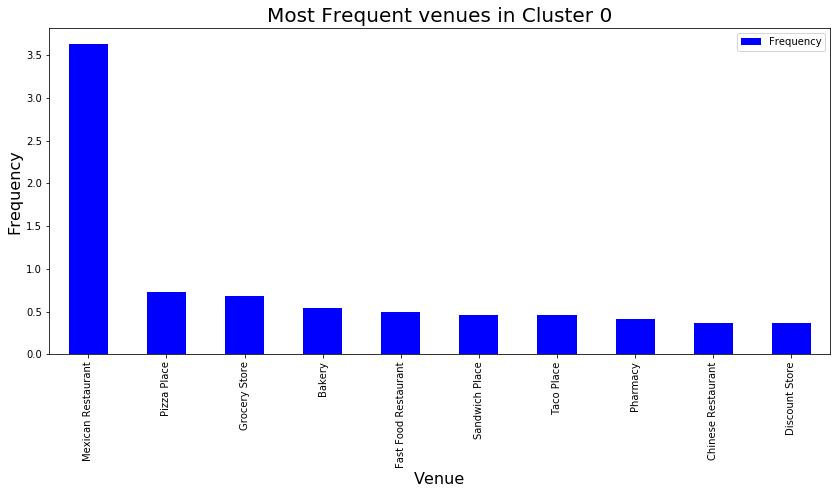

In [32]:
Cluster0.head(10).plot(kind='bar', x='Venue', y='Frequency',  figsize=(14, 6),  color='Blue')
plt.xlabel('Venue', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Most Frequent venues in Cluster 0', fontsize=20)
plt.show()

<p style='text-align: justify;'><font size = 4><b>Mexican Restaurant</b> business is the most frequent in this cluster of Neighborhoods. On average there seems to be at least three <b>Mexican Restaurants</b> in each of the neighborhoods in this cluster. <b>Pizza place</b> the second most frequent business in this cluster has a frequency of about 0.75 and hence on average could be found in 3 out of every 4 neighborhoods in this cluster approximately.<br><br><b>Mexican Restaurant</b> business is not advisable to be started in this cluster of neighborhoods due to its high frequency which would result in high competition.</font></p><br><br>

In [33]:
# Display 10 least frequent business types in the neighborhood of cluster 0
Cluster0.tail(10).T

,96,97,98,99,100,101,102,103,104,105
Venue,Food & Drink Shop,Football Stadium,Gay Bar,German Restaurant,Historic Site,Hotel,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Yoga Studio
Frequency,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045,0.045


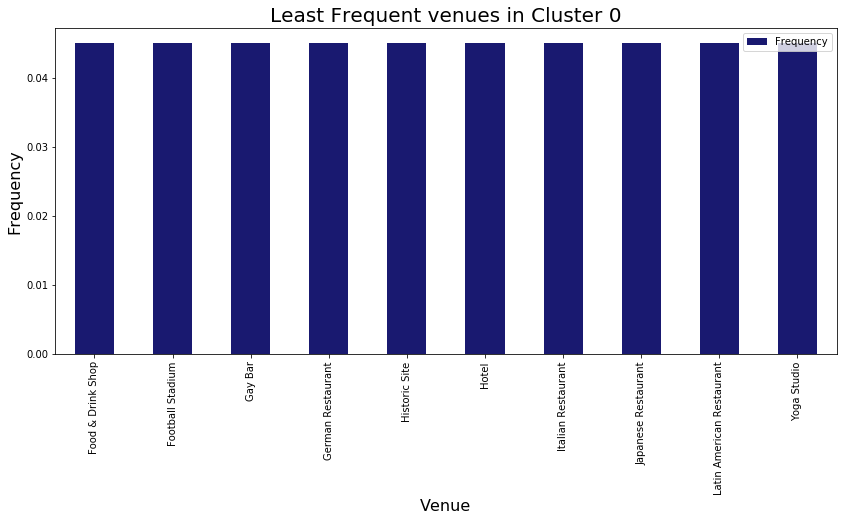

In [34]:
Cluster0.tail(10).plot(kind='bar', x='Venue', y='Frequency',  figsize=(14, 6),  color='MidnightBlue')
plt.xlabel('Venue', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Least Frequent venues in Cluster 0', fontsize=20)
plt.show()

<font size = 4>The above shown businesses are the least frequent and hence would be adivsable to be begun in this cluster of neighborhoods due to their scarcity.</font><br><br>

## <br><br><center>CLUSTER 1</center>

In [35]:
Cluster1.reset_index(drop='True', inplace=True)
Cluster1.head()

,Neighborhood,Community Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Albany Park,41.968327,-87.728028,1,Pizza Place,Korean Restaurant,Hookah Bar,Seafood Restaurant,Thai Restaurant,Fried Chicken Joint,Taco Place,Mobile Phone Shop,Financial or Legal Service,Snack Place
1,Andersonville,Edgewater,41.981658,-87.668476,1,Coffee Shop,Bakery,Breakfast Spot,Lounge,Sandwich Place,Burger Joint,Café,Bus Station,Miscellaneous Shop,New American Restaurant
2,Armour Square,Armour Square,41.840755,-87.634019,1,Chinese Restaurant,Cosmetics Shop,Sandwich Place,Hot Dog Joint,Grocery Store,Soccer Field,Café,Gas Station,Italian Restaurant,Fast Food Restaurant
3,Avondale,Avondale,41.941501,-87.702502,1,Mexican Restaurant,Coffee Shop,Dance Studio,Food Truck,Martial Arts Dojo,German Restaurant,Donut Shop,Restaurant,Korean Restaurant,Theater
4,Avondale Gardens,Irving Park,41.946471,-87.720072,1,Sandwich Place,Bus Station,Italian Restaurant,Argentinian Restaurant,Intersection,Gas Station,Train Station,Park,New American Restaurant,General Entertainment


In [36]:
# Create map
map_clusters = folium.Map(location=[chicago_lat, chicago_long], zoom_start=11)

# Add markers to the map
for lat, lon, neighborhood, comarea in zip(Cluster1['Latitude'], Cluster1['Longitude'], Cluster1['Neighborhood'], Cluster1['Community Area']):
    
    label = folium.Popup(str(neighborhood) +" , "+ str(comarea), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="Gold",
        fill=True,
        fill_color="Gold",
        fill_opacity=0.7).add_to(map_clusters)

# Add title to the Map    
title = '''<h3 align="center" style="font-size:20px"><b>Chicago Neighborhood in Cluster 1</b></h3>'''
map_clusters.get_root().html.add_child(folium.Element(title))       

# Display Map
map_clusters

In [37]:
# Selecting Cluster 1 in a new DataFrame
Cluster1 = chicago_venues[chicago_venues['Clusters']==1]

# Calculating frequency of each venue category
Cluster1 = pd.DataFrame(round(Cluster1.groupby('Venue Category').count()['Neighborhood'] / len(Cluster1['Neighborhood'].unique()),3))
Cluster1.reset_index(inplace=True)

# Renaming columns
Cluster1.rename( columns={'Venue Category':'Venue', 'Neighborhood':'Frequency'}, inplace=True)

# Sort DataFrame based on Frequency of each venue category
Cluster1.sort_values(['Frequency'], ascending=False, inplace=True)
Cluster1.reset_index(drop=True,inplace=True)

# Display top 10 most frequent business types in the neighborhood of cluster 1
Cluster1.head(10).T

,0,1,2,3,4,5,6,7,8,9
Venue,Coffee Shop,Pizza Place,Bar,Sandwich Place,Mexican Restaurant,Italian Restaurant,Bus Station,Gym,American Restaurant,Park
Frequency,1.309,1.287,1.088,1.044,1.037,0.801,0.654,0.61,0.603,0.588


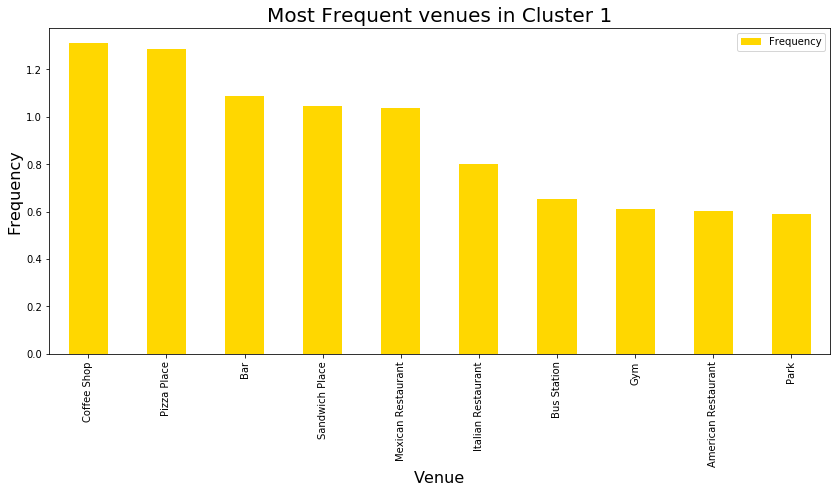

In [38]:
Cluster1.head(10).plot(kind='bar', x='Venue', y='Frequency',  figsize=(14, 6),  color='Gold')
plt.xlabel('Venue', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Most Frequent venues in Cluster 1', fontsize=20)
plt.show()

<p style='text-align: justify;'><font size = 4>As seen from above business such as <b>Coffee shop, Pizza place </b>etc are the most frequent in this cluster of Neighborhoods. On average there seems to be at least one venue for each of the top five most frequent businesses <b>Coffee shop, Pizza place, Bar, Sandwich Place</b> and <b>Mexican restaurant</b> in each of the neighborhoods in this cluster. Hence it is not recommended to start any of the above shown business types in this cluster of neighborhoods due to their high frequency.</font></p><br><br>

In [39]:
# Display 10 least frequent business types in the neighborhood of cluster 1
Cluster1.tail(10).T

,325,326,327,328,329,330,331,332,333,334
Venue,Post Office,Fruit & Vegetable Store,Rock Club,Road,Halal Restaurant,Residential Building (Apartment / Condo),Heliport,Hockey Arena,Print Shop,Indian Chinese Restaurant
Frequency,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007


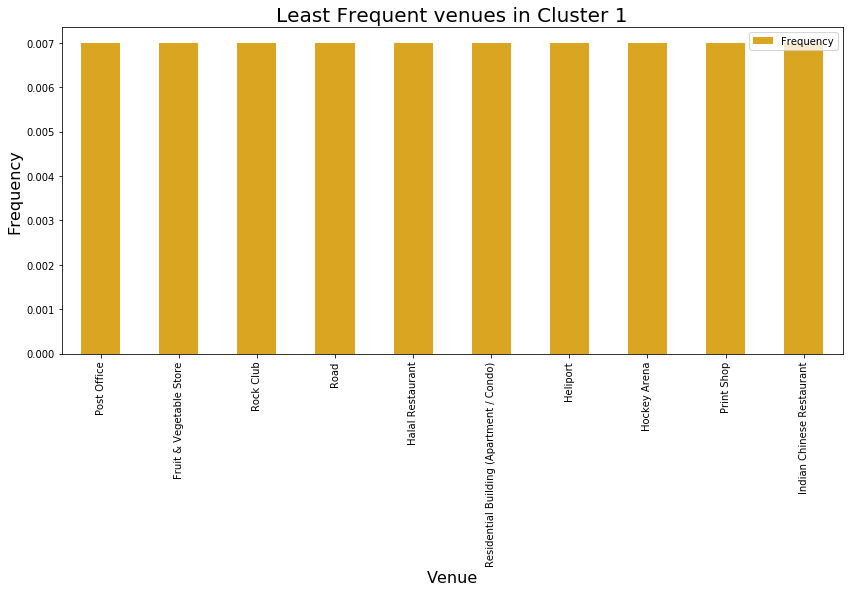

In [40]:
Cluster1.tail(10).plot(kind='bar', x='Venue', y='Frequency',  figsize=(14, 6),  color='GoldenRod')
plt.xlabel('Venue', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Least Frequent venues in Cluster 1', fontsize=20)
plt.show()

<font size = 4>The above shown businesses are the least frequent and hence would be adivsable to be begun in this cluster of neighborhoods due to their scarcity. Also with a total of 136 different neighborhoods in this cluster there is wide room to expand a business to other neighborhoods due their similarities.</font><br><br>

## <br><br><center>CLUSTER 2</center>

In [41]:
Cluster2.reset_index(drop='True', inplace=True)
Cluster2.head()

,Neighborhood,Community Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronzeville,Douglas,41.824774,-87.624294,2,Gym / Fitness Center,Convenience Store,Southern / Soul Food Restaurant,Motel,Liquor Store,Athletics & Sports,Train Station,Italian Restaurant,Art Gallery,Park
1,Chatham,Chatham,41.740120,-87.614636,2,Boutique,Park,Ice Cream Shop,Donut Shop,Fast Food Restaurant,Lounge,Discount Store,Event Space,Factory,Falafel Restaurant
2,Chrysler Village,Clearing,41.776387,-87.751950,2,Airport Terminal,Bank,Heliport,Airport,Airport Service,Park,Martial Arts Dojo,Event Space,Eye Doctor,Factory
3,Clarendon Park,Uptown,41.963360,-87.648602,2,Bus Station,Park,Convenience Store,Pharmacy,American Restaurant,Beach,Harbor / Marina,Café,Clothing Store,General Entertainment
4,Crestline,Ashburn,41.744285,-87.724801,2,Sports Bar,Park,Food,Gas Station,Mexican Restaurant,Sandwich Place,Donut Shop,Shop & Service,Seafood Restaurant,Event Service


In [42]:
# Create map
map_clusters = folium.Map(location=[chicago_lat, chicago_long], zoom_start=11)

# Add markers to the map
for lat, lon, neighborhood, comarea in zip(Cluster2['Latitude'], Cluster2['Longitude'], Cluster2['Neighborhood'], Cluster2['Community Area']):
    
    label = folium.Popup(str(neighborhood) +" , "+ str(comarea), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="Red",
        fill=True,
        fill_color="Red",
        fill_opacity=0.7).add_to(map_clusters)

# Add title to the Map    
title = '''<h3 align="center" style="font-size:20px"><b>Chicago Neighborhood in Cluster 2</b></h3>'''
map_clusters.get_root().html.add_child(folium.Element(title))       

# Display Map
map_clusters

In [43]:
# Selecting Cluster 2 in a new DataFrame
Cluster2 = chicago_venues[chicago_venues['Clusters']==2]

# Calculating frequency of each venue category
Cluster2 = pd.DataFrame(round(Cluster2.groupby('Venue Category').count()['Neighborhood'] / len(Cluster2['Neighborhood'].unique()),3))
Cluster2.reset_index(inplace=True)

# Renaming columns
Cluster2.rename( columns={'Venue Category':'Venue', 'Neighborhood':'Frequency'}, inplace=True)

# Sort DataFrame based on Frequency of each venue category
Cluster2.sort_values(['Frequency'], ascending=False, inplace=True)
Cluster2.reset_index(drop=True, inplace=True)

# Display top 10 most frequent business types in the neighborhood of cluster 2
Cluster2.head(10).T

,0,1,2,3,4,5,6,7,8,9
Venue,Park,Bus Station,Convenience Store,Beach,Boutique,Sandwich Place,Train Station,Gym / Fitness Center,Art Gallery,Fast Food Restaurant
Frequency,1.857,0.619,0.381,0.333,0.238,0.238,0.238,0.19,0.19,0.19


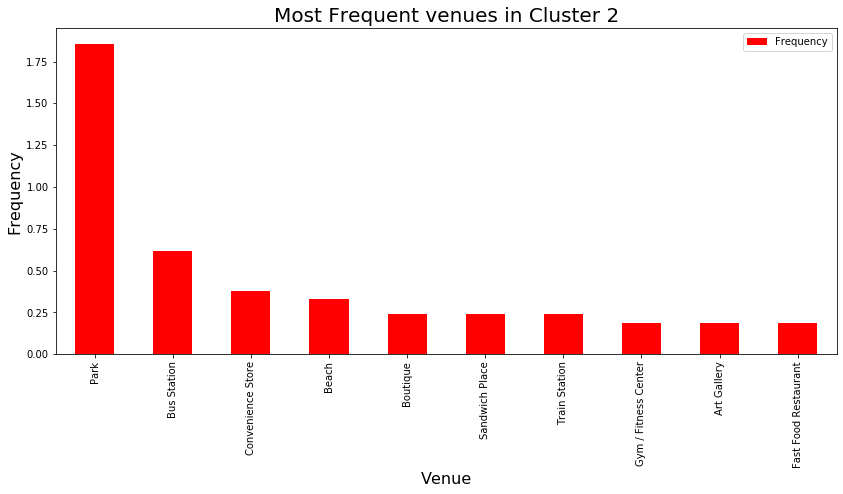

In [44]:
Cluster2.head(10).plot(kind='bar', x='Venue', y='Frequency',  figsize=(14, 6),  color='Red')
plt.xlabel('Venue', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Most Frequent venues in Cluster 2', fontsize=20)
plt.show()

<p style='text-align: justify;'><font size = 4>Apart from <b>Parks </b>other businesses are less frequent (lower than one) in this cluster.  

In [45]:
# Display 10 least frequent business types in the neighborhood of cluster 2
Cluster2.tail(10).T

,91,92,93,94,95,96,97,98,99,100
Venue,Hobby Shop,Airport,Field,Hardware Store,Gift Shop,General Entertainment,Gas Station,Fried Chicken Joint,Food Court,Women's Store
Frequency,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048


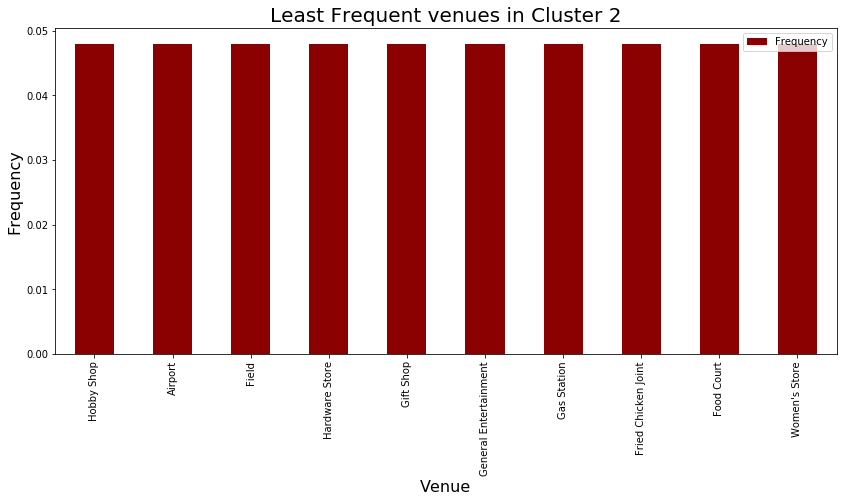

In [46]:
Cluster2.tail(10).plot(kind='bar', x='Venue', y='Frequency',  figsize=(14, 6),  color='DarkRed')
plt.xlabel('Venue', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Least Frequent venues in Cluster 2', fontsize=20)
plt.show()

<font size = 4>The above shown businesses are the least frequent and hence would be adivsable to be begun in this cluster of neighborhoods due to their scarcity.<br><br>This cluster of neighborhoods would be a good sarting point for most businesses due to the lower frequency of most of the businesses.</font><br><br>

## <br><br><center>CLUSTER 3</center>

In [47]:
Cluster3.reset_index(drop='True', inplace=True)
Cluster3.head()

,Neighborhood,Community Area,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Belmont Terrace,Dunning,41.941422,-87.832871,3,Salon / Barbershop,Ice Cream Shop,Currency Exchange,Automotive Shop,Sandwich Place,Intersection,Donut Shop,Fast Food Restaurant,Gift Shop,Clothing Store
1,Chicago Lawn,Chicago Lawn,41.771839,-87.693179,3,Fast Food Restaurant,Park,American Restaurant,Intersection,Fish & Chips Shop,Zoo Exhibit,Event Service,Event Space,Eye Doctor,Factory
2,East Chatham,Chatham,41.748134,-87.601357,3,Train Station,Fried Chicken Joint,Caribbean Restaurant,BBQ Joint,Sandwich Place,Salon / Barbershop,Martial Arts Dojo,Fast Food Restaurant,Hardware Store,Falafel Restaurant
3,Englewood,Englewood,41.775305,-87.641642,3,Fast Food Restaurant,Train Station,Nightclub,Liquor Store,Discount Store,Zoo Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm
4,The Gap,Douglas,41.834259,-87.619872,3,Fast Food Restaurant,Cosmetics Shop,Wings Joint,Sandwich Place,Fried Chicken Joint,Pizza Place,Salon / Barbershop,Liquor Store,Bank,Mobile Phone Shop


In [48]:
# Create map
map_clusters = folium.Map(location=[chicago_lat, chicago_long], zoom_start=11)

# Add markers to the map
for lat, lon, neighborhood, comarea in zip(Cluster3['Latitude'], Cluster3['Longitude'], Cluster3['Neighborhood'], Cluster3['Community Area']):
    
    label = folium.Popup(str(neighborhood) +" , "+ str(comarea), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="Lime",
        fill=True,
        fill_color="Lime",
        fill_opacity=0.7).add_to(map_clusters)

# Add title to the Map    
title = '''<h3 align="center" style="font-size:20px"><b>Chicago Neighborhood in Cluster 3</b></h3>'''
map_clusters.get_root().html.add_child(folium.Element(title))       

# Display Map
map_clusters

In [49]:
# Selecting Cluster 3 in a new DataFrame
Cluster3 = chicago_venues[chicago_venues['Clusters']==3]

# Calculating frequency of each venue category
Cluster3 = pd.DataFrame(round(Cluster3.groupby('Venue Category').count()['Neighborhood'] / len(Cluster3['Neighborhood'].unique()),3))
Cluster3.reset_index(inplace=True)

# Renaming columns
Cluster3.rename( columns={'Venue Category':'Venue', 'Neighborhood':'Frequency'}, inplace=True)

# Sort DataFrame based on Frequency of each venue category
Cluster3.sort_values(['Frequency'], ascending=False, inplace=True)
Cluster3.reset_index(drop=True, inplace=True)

# Display top 10 most frequent business types in the neighborhood of cluster 3
Cluster3.head(10).T

,0,1,2,3,4,5,6,7,8,9
Venue,Fast Food Restaurant,Indian Restaurant,American Restaurant,Fried Chicken Joint,Park,Sandwich Place,Currency Exchange,Cosmetics Shop,Seafood Restaurant,Grocery Store
Frequency,1.371,0.857,0.629,0.571,0.514,0.429,0.371,0.371,0.314,0.286


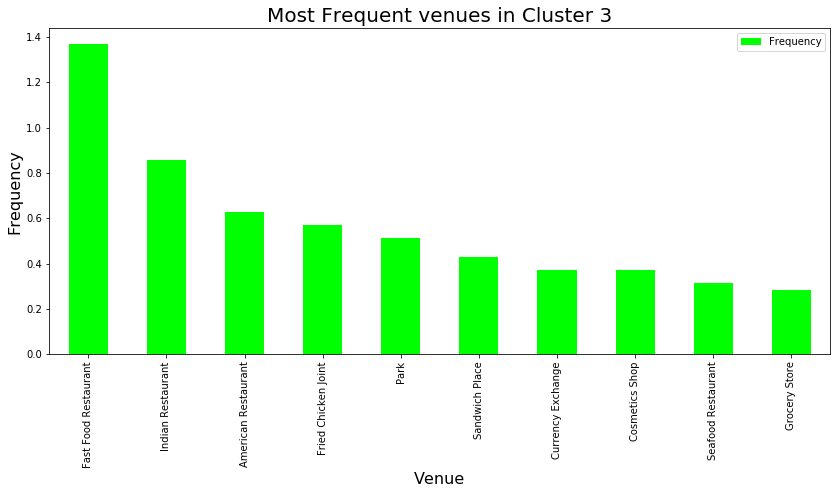

In [50]:
Cluster3.head(10).plot(kind='bar', x='Venue', y='Frequency',  figsize=(14, 6),  color='Lime')
plt.xlabel('Venue', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Most Frequent venues in Cluster 3', fontsize=20)
plt.show()

<font size=4>Restaurants are the most popular businesses in this cluster. The top four most frequent businesses are all restaurants <b>Fast Food, Indian, American</b> and <b>Fried Chicken</b>. Starting a restaurant of previous type in this cluster would not be advisable due to high competition. </font><br><br>

In [51]:
# Display 10 least frequent business types in the neighborhood of cluster 3
Cluster3.tail(10).T

,85,86,87,88,89,90,91,92,93,94
Venue,Mexican Restaurant,Optical Shop,Cuban Restaurant,Food Truck,Performing Arts Venue,Fish Market,Public Art,Jazz Club,Dry Cleaner,Recreation Center
Frequency,0.029,0.029,0.029,0.029,0.029,0.029,0.029,0.029,0.029,0.029


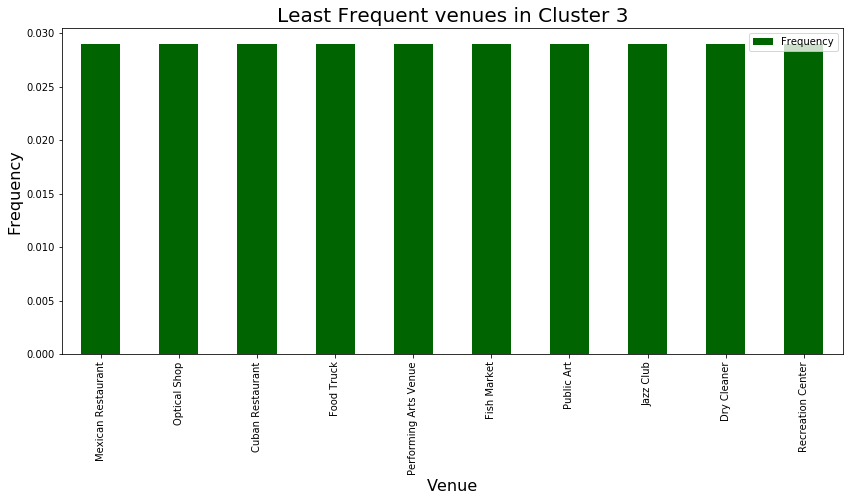

In [52]:
Cluster3.tail(10).plot(kind='bar', x='Venue', y='Frequency',  figsize=(14, 6),  color='DarkGreen')
plt.xlabel('Venue', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Least Frequent venues in Cluster 3', fontsize=20)
plt.show()

<font size = 4><b>Mexican Restaurants</b> and <b>food trucks</b> are less frequent and this cluster would be good place to start any of the above displayed businesses since they would result in lower competition.</font><br><br>

In [53]:
# Save each dataframe to a different worksheet.
Cluster0.to_excel(writer, sheet_name='Cluster 0', index=False)
Cluster1.to_excel(writer, sheet_name='Cluster 1', index=False)
Cluster2.to_excel(writer, sheet_name='Cluster 2', index=False)
Cluster3.to_excel(writer, sheet_name='Cluster 3', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

<br><br><p style='text-align: justify;'><font size=6>Please find the report for this project, along with a presentation and an excel file which contains the dataframes of venues, clusters and corresponding details located in my GitHub page <a href="https://github.com/Prasanna-Vengatesh-Venkataraman/Chicago_Neighborhood_Business_Analysis">here</a></font></p>